In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,f1_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
df = pd.read_csv('/kaggle/input/employee-dataset/Employee.csv')
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [4]:
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [5]:
df.duplicated().sum()

1889

In [6]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

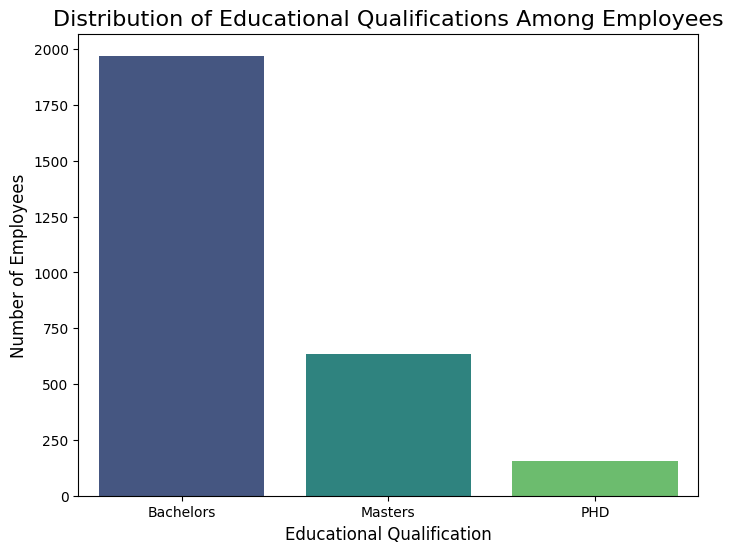

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Education', palette='viridis')
plt.title('Distribution of Educational Qualifications Among Employees', fontsize=16)
plt.xlabel('Educational Qualification', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)
plt.show()

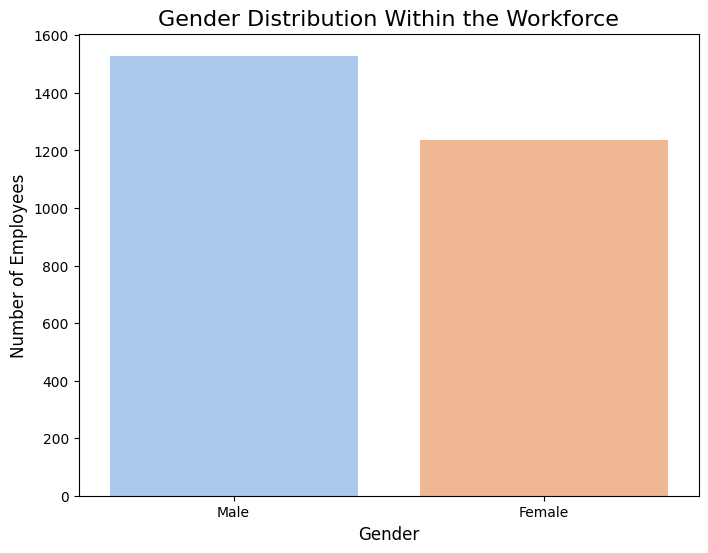

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', palette='pastel')
plt.title('Gender Distribution Within the Workforce', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)
plt.show()

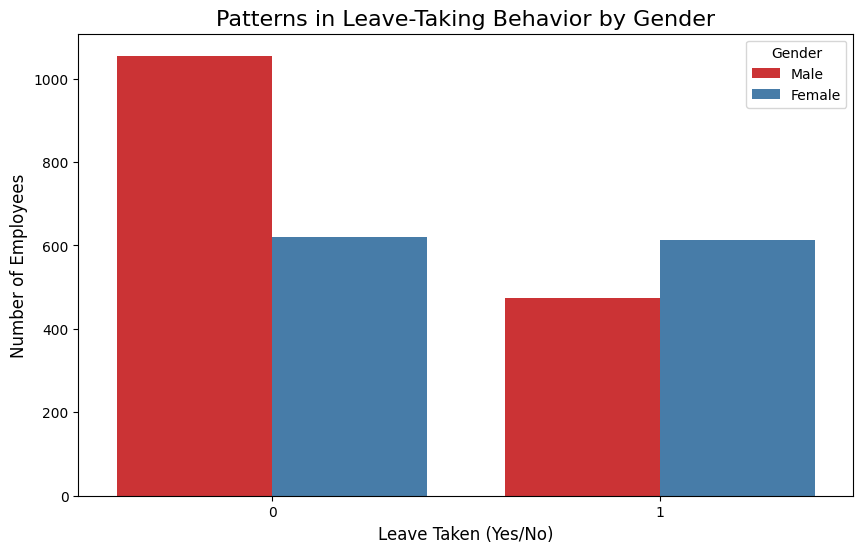

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='LeaveOrNot', hue='Gender', palette='Set1')
plt.title('Patterns in Leave-Taking Behavior by Gender', fontsize=16)
plt.xlabel('Leave Taken (Yes/No)', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)
plt.legend(title='Gender')
plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2764 entries, 0 to 4651
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  2764 non-null   object
 1   JoiningYear                2764 non-null   int64 
 2   City                       2764 non-null   object
 3   PaymentTier                2764 non-null   int64 
 4   Age                        2764 non-null   int64 
 5   Gender                     2764 non-null   object
 6   EverBenched                2764 non-null   object
 7   ExperienceInCurrentDomain  2764 non-null   int64 
 8   LeaveOrNot                 2764 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 215.9+ KB


In [11]:
le = LabelEncoder()
for col in ['Education', 'City', 'Gender', 'EverBenched']:
    df[col] = le.fit_transform(df[col])

In [12]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2764 entries, 0 to 4651
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Education                  2764 non-null   int64
 1   JoiningYear                2764 non-null   int64
 2   City                       2764 non-null   int64
 3   PaymentTier                2764 non-null   int64
 4   Age                        2764 non-null   int64
 5   Gender                     2764 non-null   int64
 6   EverBenched                2764 non-null   int64
 7   ExperienceInCurrentDomain  2764 non-null   int64
 8   LeaveOrNot                 2764 non-null   int64
dtypes: int64(9)
memory usage: 215.9 KB


In [14]:
x = df.drop(['LeaveOrNot'], axis=1)
y = df['LeaveOrNot']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
scaler = MinMaxScaler(feature_range=(0, 1))
x =scaler.fit_transform(x)
x.min(),x.max()

(0.0, 1.0)

In [16]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
y_pred = log_reg.predict(x_test)

In [18]:
accuracy_score(y_test, y_pred)
f1_score(y_test, y_pred)
confusion_matrix(y_test, y_pred)
classification_report(y_test, y_pred)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.6763110307414105
F1 Score: 0.4871060171919771
Confusion Matrix:
 [[289  46]
 [133  85]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.86      0.76       335
           1       0.65      0.39      0.49       218

    accuracy                           0.68       553
   macro avg       0.67      0.63      0.63       553
weighted avg       0.67      0.68      0.65       553



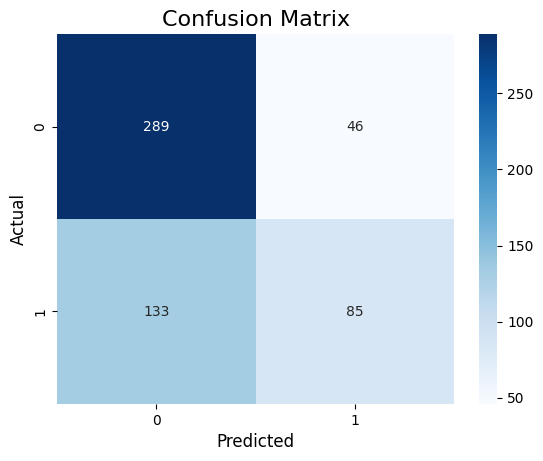

In [19]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix', fontsize=16)  
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score,precision_score,recall_score
from tqdm import tqdm

Models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'DT': DecisionTreeClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
}

In [21]:
ModelName = []
ModelAccuracy = []

for nameModel, model in tqdm(Models.items()):
    model.fit(x_train, y_train)
    ModelName.append(nameModel)
    y_pred = model.predict(x_test)
    ModelAccuracy.append([
        accuracy_score(y_test, y_pred),
        f1_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred)  # إزالة الفاصل السطر وإغلاق القوس بشكل صحيح
    ])

# إنشاء DataFrame
Model_accuracy = pd.DataFrame(ModelAccuracy, index=ModelName, columns=['accuracy_score', 'f1_score', 'precision_score', 'recall_score'])
Model_accuracy

  0%|          | 0/5 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 40%|████      | 2/5 [00:00<00:01,  2.60it/s]/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
100%|██████████| 5/5 [00:01<00:00,  4.71it/s]


,accuracy_score,f1_score,precision_score,recall_score
Logistic Regression,0.676311,0.487106,0.648855,0.389908
Random Forest,0.743219,0.645000,0.708791,0.591743
DT,0.678119,0.580189,0.597087,0.564220
SVM,0.605787,0.000000,0.000000,0.000000
KNN,0.699819,0.556150,0.666667,0.477064


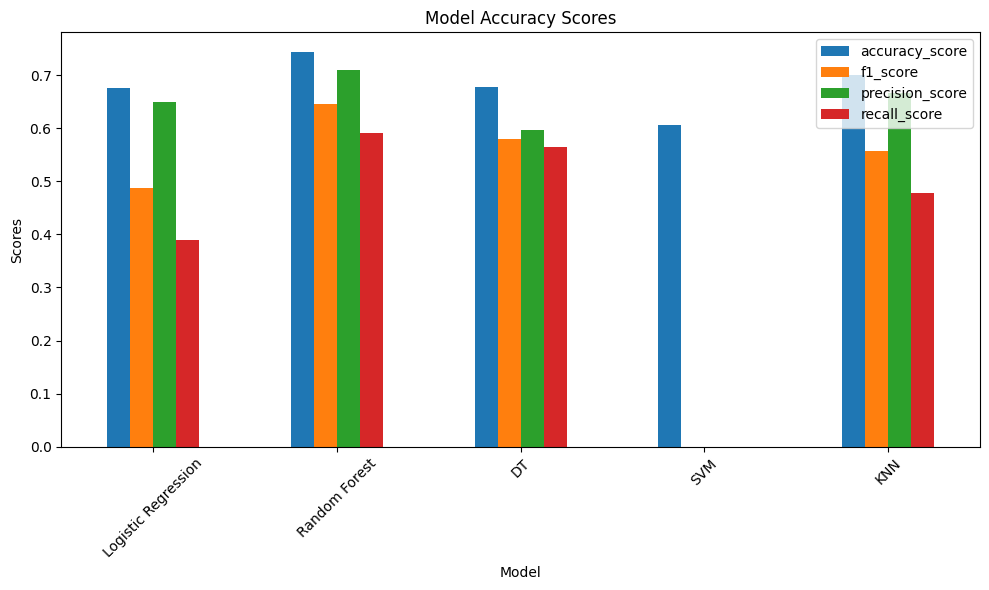

In [22]:
import matplotlib.pyplot as plt

Model_accuracy.plot(kind='bar', figsize=(10, 6))

# Customizing the plot
plt.xlabel('Model')
plt.ylabel('Scores')
plt.title('Model Accuracy Scores')
plt.xticks(rotation=45)  # Rotate model names for better readability
plt.legend(loc='upper right')
plt.tight_layout()  # Adjust layout to fit labels

# Display the plot
plt.show()